1.a.

    fold-change = 1 / (1 + R/N_NS * e^(-∆E_r/kBT))
    1 + R/N_NS * e^(-∆E_r/kBT) = 1 / fold-change
    e^(-∆E_r/kBT) = (1 / fold-change - 1) / (R/N_NS) = (N_NS - N_NS * fold-change) / (R * fold-change)
    -∆E_r/kBT = ln((N_NS - N_NS * fold-change) / (R * fold-change))
    
    ∆E_r = -ln((N_NS - N_NS * fold-change) / (R * fold-change)) * kBT
    
1.b.

    ∆E_r_O1 = -ln((4.6*10^6 *(1 - 2.77*10^−3) / (260 * 2.77*10^−3)) * kBT = -15.67 kBT
    
    ∆E_r_O2 = -ln((4.6*10^6 *(1 - 1.24*10^−2) / (260 * 1.24*10^−2)) * kBT = -14.16 kBT
    
    ∆E_r_O3 = -ln((4.6*10^6 *(1 - 4.77*10^−1) / (260 * 4.77*10^−1)) * kBT = -9.87 kBT
    

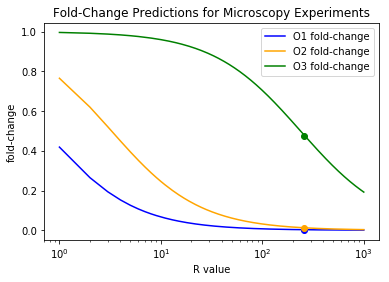

In [4]:
# 1.b.

# Imports
import numpy
import matplotlib.pyplot as plt

%matplotlib inline

# Parameters solved for
N_NS = 4.6*10**6
dE_r_O1 = -15.67
dE_r_O2 = -14.16
dE_r_O3 = -9.87


# Initialize matrices
fc_01 = numpy.zeros(1000)
fc_02 = numpy.zeros(1000)
fc_03 = numpy.zeros(1000)

# Calculate data points
for R in range(1000):
    fc_01[R] = 1 / (1 + (R+1)/N_NS * numpy.e**(-1*dE_r_O1))
    fc_02[R] = 1 / (1 + (R+1)/N_NS * numpy.e**(-1*dE_r_O2))
    fc_03[R] = 1 / (1 + (R+1)/N_NS * numpy.e**(-1*dE_r_O3))

# Plot stuff
plt.plot(range(1, 1001), fc_01, label = 'O1 fold-change', color = 'blue')
plt.plot(range(1, 1001), fc_02, label = 'O2 fold-change', color = 'orange')
plt.plot(range(1, 1001), fc_03, label = 'O3 fold-change', color = 'green')
plt.plot(260, 2.77*10**(-3), marker = 'o', color = 'blue')
plt.plot(260, 1.24*10**(-2), marker = 'o', color = 'orange')
plt.plot(260, 4.77*10**(-1), marker = 'o', color = 'green')
plt.title('Fold-Change Predictions for Microscopy Experiments')
plt.xlabel('R value')
plt.ylabel('fold-change')
plt.xscale('log')
plt.legend()

In [5]:
# 2.a.

# Imports
import numpy
import matplotlib.pyplot as plt
import seaborn
import skimage.io
import skimage.exposure
import skimage.measure

%matplotlib inline

def segment_im(im_phase, ip_dist=0.160, area_bounds=(1, 4), phase_thresh=0.3, show_mask=False):

    # Normalize im_phase
    im_norm = (im_phase - im_phase.min())/(im_phase.max() - im_phase.min())
    
    # Apply the threshold
    im_thresh = im_norm < phase_thresh
    
    # Label each cell 
    im_lab, num_obj = skimage.measure.label(im_thresh, return_num=True)
    
    # Initialize new image that is same size as im_thresh that will be our segmentation mask
    im_approved = numpy.zeros_like(im_thresh)

    # Loop through each cell calculating the cell's area, and if that area is between area_bounds add the cell to
    # im_approved
    for i in range(num_obj):
        area = numpy.sum(im_lab == i + 1) * ip_dist**2
        if(area > area_bounds[0] and area < area_bounds[1]):
            im_approved += (im_lab == i + 1)
    
    # Make a copy of im_norm
    im_copy = numpy.copy(im_norm)
    
    # Add a scale bar to im_norm and im_copy
    bar_length = int(10 / ip_dist)
    im_norm[10:20, 10:10 + bar_length] = 1.0
    im_copy[10:20, 10:10 + bar_length] = 1.0
    
    # Give segmented pixels a value of 1.0
    im_copy[im_approved] = 1.0
    
    # If show_mask == True, display the segmentation mask on top of original image
    if (show_mask):
        mask_rgb = numpy.dstack((im_norm, im_copy, im_copy))
        plt.imshow(mask_rgb)
    
    # Return segmentation mask
    return im_approved


In [6]:
im_phase1 = skimage.io.imread('lacI_titration/O1_delta_phase_pos_01.tif')
im_phase2 = skimage.io.imread('lacI_titration/O2_delta_phase_pos_01.tif')
im_phase3 = skimage.io.imread('lacI_titration/O3_auto_phase_pos_01.tif')
im_phase4 = skimage.io.imread('lacI_titration/O1_R60_phase_pos_01.tif')

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

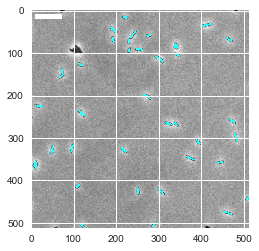

In [7]:
segment_im(im_phase1, show_mask=True)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

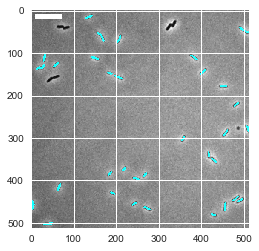

In [8]:
segment_im(im_phase2, show_mask=True)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

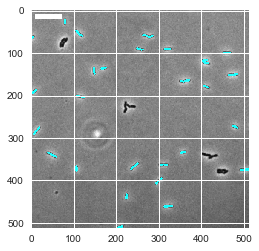

In [9]:
segment_im(im_phase3, show_mask=True)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

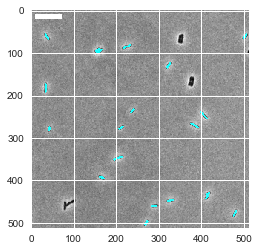

In [10]:
segment_im(im_phase4, show_mask=True)

In [57]:
# 2.b.

def extract_intensities(im_phase, im_fluor):
    
    # Create segmentation mask
    mask = segment_im(im_phase)
    
    mask_lab, num_obj = skimage.measure.label(mask, return_num=True)
    
    # Initialize storage vectors for the cell areas and intensities
    tot_ints = numpy.zeros(num_obj) 

    # Loop through each cell. 
    for i in range(num_obj):
        
        # Get the single cell mask. 
        cell = (mask_lab == i + 1)

        # Store the total intensity
        int_im = cell * im_fluor
        tot_ints[i] = numpy.sum(int_im)
        
    # Return list containing the total fluorescent intensities
    return tot_ints


In [58]:
im_fluor1 = skimage.io.imread('lacI_titration/O1_delta_yfp_pos_01.tif')
im_fluor2 = skimage.io.imread('lacI_titration/O2_delta_yfp_pos_01.tif')
im_fluor3 = skimage.io.imread('lacI_titration/O3_auto_yfp_pos_01.tif')
im_fluor4 = skimage.io.imread('lacI_titration/O1_R60_yfp_pos_01.tif')

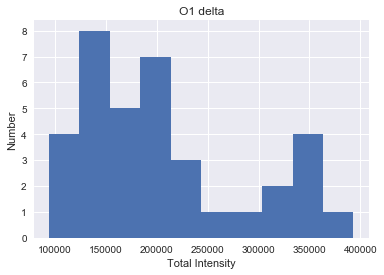

In [59]:
plt.hist(extract_intensities(im_phase1, im_fluor1))
plt.title('O1 delta')
plt.xlabel('Total Intensity')
plt.ylabel('Number')

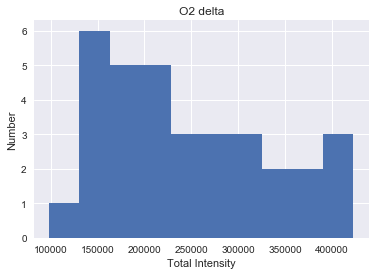

In [60]:
plt.hist(extract_intensities(im_phase2, im_fluor2))
plt.title('O2 delta')
plt.xlabel('Total Intensity')
plt.ylabel('Number')

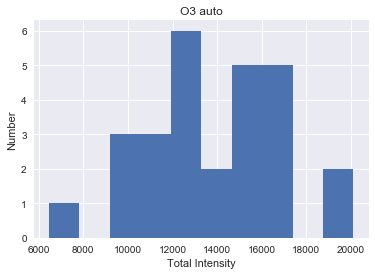

In [61]:
plt.hist(extract_intensities(im_phase3, im_fluor3))
plt.title('O3 auto')
plt.xlabel('Total Intensity')
plt.ylabel('Number')

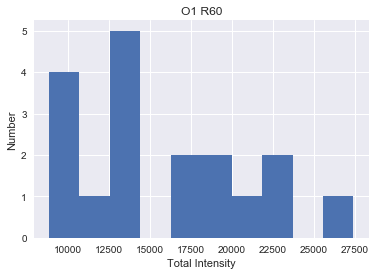

In [62]:
plt.hist(extract_intensities(im_phase4, im_fluor4))
plt.title('O1 R60')
plt.xlabel('Total Intensity')
plt.ylabel('Number')

In [31]:
# 2.c.

# Imports
import glob

def strain_totals(op, rep):
    
    # Find files
    files_phase = glob.glob('lacI_titration/' + op + '_' + rep + '_phase*.tif')
    files_fluor = glob.glob('lacI_titration/' + op + '_' + rep + '_yfp*.tif')
    
    # Initialize list to store intensities
    all_int = []
    
    # Loop through each corresponding phase and fluorescence image, calculate the intensities for each cell, and
    # append those intensities to all_int
    for i in range(len(files_phase)):
            im_phase = skimage.io.imread(files_phase[i])
            im_fluor = skimage.io.imread(files_fluor[i])
            all_int.extend(extract_intensities(im_phase, im_fluor))
            
    # Return list of intensities
    return all_int


In [32]:
all_int1 = strain_totals('O1', 'auto')
all_int2 = strain_totals('O2', 'auto')
all_int3 = strain_totals('O2', 'delta')
all_int4 = strain_totals('O3', 'delta')

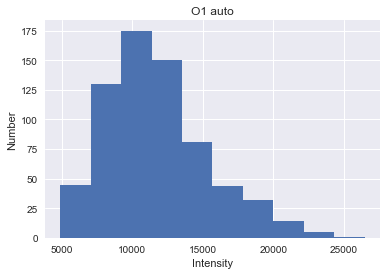

In [33]:
plt.hist(all_int1)
plt.title('O1 auto')
plt.xlabel('Intensity')
plt.ylabel('Number')

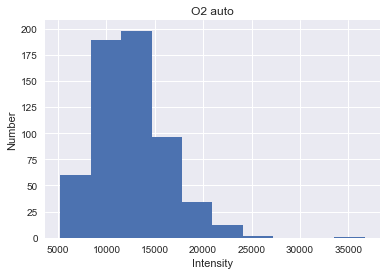

In [34]:
plt.hist(all_int2)
plt.title('O2 auto')
plt.xlabel('Intensity')
plt.ylabel('Number')

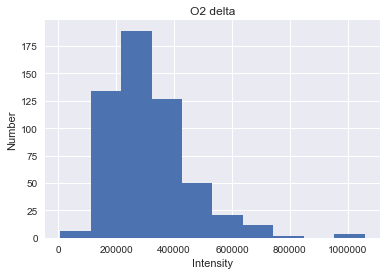

In [35]:
plt.hist(all_int3)
plt.title('O2 delta')
plt.xlabel('Intensity')
plt.ylabel('Number')

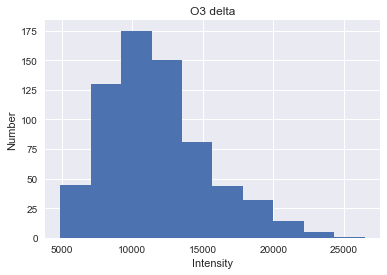

In [36]:
plt.hist(all_int1)
plt.title('O3 delta')
plt.xlabel('Intensity')
plt.ylabel('Number')

[[ 0.0210242   0.01909085  0.0097609   0.00557686]
 [ 0.14532349  0.04216874  0.0148685   0.00973137]
 [ 0.89913028  0.74661113  0.96938875  0.73675618]]


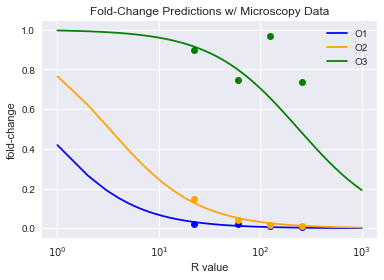

In [43]:
# 2.d.

# Declare lists of ops and reps
ops = ['O1', 'O2', 'O3']
reps = ['auto', 'delta', 'R22', 'R60', 'R124', 'R260']

# Initialize arrays to store mean intensities and fold-changes
mean_array = numpy.zeros((3, 6))
fc_array = numpy.zeros((3,4))

# Loop through ops and reps and calulate mean intensities and fold-changes
for i in range(len(ops)):
    for j in range(len(reps)):
        int_list = strain_totals(ops[i], reps[j])
        mean_array[i][j] = numpy.sum(int_list) / len(int_list)
        if (j > 1):
            fc_array[i][j-2] = (mean_array[i][j] - mean_array[i][0]) / (mean_array[i][1] - mean_array[i][0])

# Print fc_array
print(fc_array)

# 2.e.

# Plot stuff
plt.plot(range(1, 1001), fc_01, label = 'O1', color = 'blue')
plt.plot(range(1, 1001), fc_02, label = 'O2', color = 'orange')
plt.plot(range(1, 1001), fc_03, label = 'O3', color = 'green')
plt.plot(22, fc_array[0][0], marker = 'o', color = 'blue')
plt.plot(60, fc_array[0][1], marker = 'o', color = 'blue')
plt.plot(124, fc_array[0][2], marker = 'o', color = 'blue')
plt.plot(260, fc_array[0][3], marker = 'o', color = 'blue')
plt.plot(22, fc_array[1][0], marker = 'o', color = 'orange')
plt.plot(60, fc_array[1][1], marker = 'o', color = 'orange')
plt.plot(124, fc_array[1][2], marker = 'o', color = 'orange')
plt.plot(260, fc_array[1][3], marker = 'o', color = 'orange')
plt.plot(22, fc_array[2][0], marker = 'o', color = 'green')
plt.plot(60, fc_array[2][1], marker = 'o', color = 'green')
plt.plot(124, fc_array[2][2], marker = 'o', color = 'green')
plt.plot(260, fc_array[2][3], marker = 'o', color = 'green')
plt.title('Fold-Change Predictions w/ Microscopy Data')
plt.xlabel('R value')
plt.ylabel('fold-change')
plt.xscale('log')
plt.legend()

3.a.

    Multiple, independent determinations of a quantity, if they agree, support the quantity as being valid. This is
    obviously true through common sense. If the same result is arrived at independently and through different
    methods, then it is highly likely that the quantitiy is accurate. 

In [81]:
# 3.b.

# Imports
import pandas
import scipy.optimize

# Function to calculate fold-change
def fold_change(R, dE_r):
    fc = 1 / (1 + (R+1)/N_NS * numpy.e**(-1*dE_r))
    return fc

# Load data
data = pandas.read_csv('lacZ_data.csv', comment='#')

# Get data for each operator
data_O1 = data[data['operator'] == 'O1']
data_O2 = data[data['operator'] == 'O2']
data_O3 = data[data['operator'] == 'O3']


∆E_r for O1 -15.47 kBT


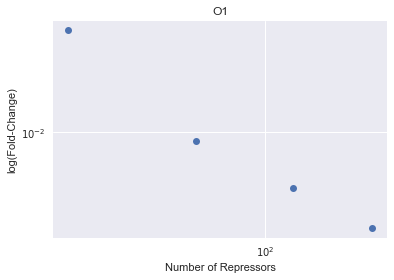

In [98]:
# Plot the data for O1
plt.plot(data_O1['repressor'], data_O1['fold_change'], 'o')
plt.title('O1')
plt.xlabel('Number of Repressors')
plt.ylabel('log(Fold-Change)')
plt.xscale('log')
plt.yscale('log')

# Find the best-fit parameter using the curve_fit function
popt, junk = scipy.optimize.curve_fit(fold_change, data_O1['repressor'], data_O1['fold_change'], p0=-15)

# Extract the value of the best-fit parameter.
best_ep1 = popt[0]
print("∆E_r for O1 %.2f kBT" %best_ep1)

∆E_r for O2 -13.84 kBT


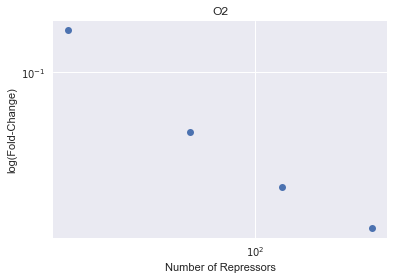

In [99]:
# Plot the data for O2
plt.plot(data_O2['repressor'], data_O2['fold_change'], 'o')
plt.title('O2')
plt.xlabel('Number of Repressors')
plt.ylabel('log(Fold-Change)')
plt.xscale('log')
plt.yscale('log')

# Find the best-fit parameter using the curve_fit function
popt, junk = scipy.optimize.curve_fit(fold_change, data_O2['repressor'], data_O2['fold_change'], p0=-15)

# Extract the value of the best-fit parameter.
best_ep2 = popt[0]
print("∆E_r for O2 %.2f kBT" %best_ep2)

∆E_r for O3 = -10.17 kBT


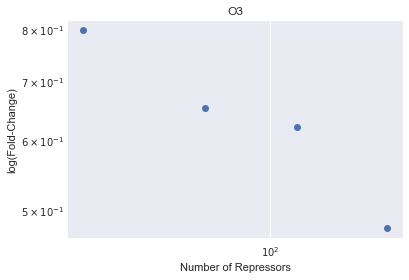

In [104]:
# Plot the data for O3
plt.plot(data_O3['repressor'], data_O3['fold_change'], 'o')
plt.title('O3')
plt.xlabel('Number of Repressors')
plt.ylabel('log(Fold-Change)')
plt.xscale('log')
plt.yscale('log')

# Find the best-fit parameter using the curve_fit function
popt, junk = scipy.optimize.curve_fit(fold_change, data_O3['repressor'], data_O3['fold_change'], p0=-15)

# Extract the value of the best-fit parameter.
best_ep3 = popt[0]
print("∆E_r for O3 = %.2f kBT" %best_ep3)

∆E_r for O1 = -15.84 kBT


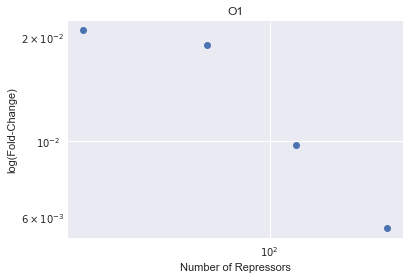

In [105]:
# 3.c.

# Plot the data for O1
rep_nums = [22, 60, 124, 260]
plt.plot(rep_nums, fc_array[0], 'o')
plt.title('O1')
plt.xlabel('Number of Repressors')
plt.ylabel('log(Fold-Change)')
plt.xscale('log')
plt.yscale('log')

# Find the best-fit parameter using the curve_fit function
popt, junk = scipy.optimize.curve_fit(fold_change, rep_nums, fc_array[0], p0=-15)

# Extract the value of the best-fit parameter.
best_ep4 = popt[0]
print("∆E_r for O1 = %.2f kBT" %best_ep4)

∆E_r for O2 = -14.06 kBT


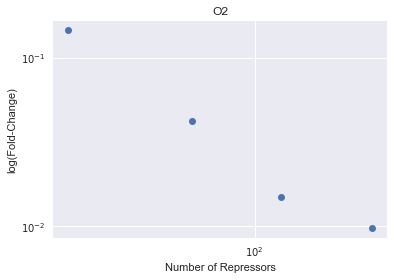

In [106]:
# Plot the data for O2
rep_nums = [22, 60, 124, 260]
plt.plot(rep_nums, fc_array[1], 'o')
plt.title('O2')
plt.xlabel('Number of Repressors')
plt.ylabel('log(Fold-Change)')
plt.xscale('log')
plt.yscale('log')

# Find the best-fit parameter using the curve_fit function
popt, junk = scipy.optimize.curve_fit(fold_change, rep_nums, fc_array[1], p0=-15)

# Extract the value of the best-fit parameter.
best_ep5 = popt[0]
print("∆E_r for O2 = %.2f kBT" %best_ep5)

∆E_r for O3 = -8.75 kBT


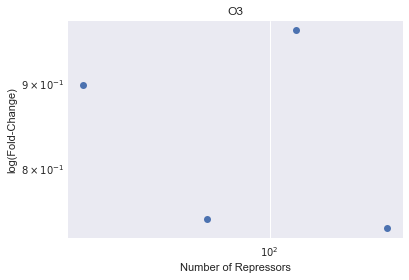

In [107]:
# Plot the data for O3
rep_nums = [22, 60, 124, 260]
plt.plot(rep_nums, fc_array[2], 'o')
plt.title('O3')
plt.xlabel('Number of Repressors')
plt.ylabel('log(Fold-Change)')
plt.xscale('log')
plt.yscale('log')

# Find the best-fit parameter using the curve_fit function
popt, junk = scipy.optimize.curve_fit(fold_change, rep_nums, fc_array[2], p0=-15)

# Extract the value of the best-fit parameter.
best_ep6 = popt[0]
print("∆E_r for O3 = %.2f kBT" %best_ep6)

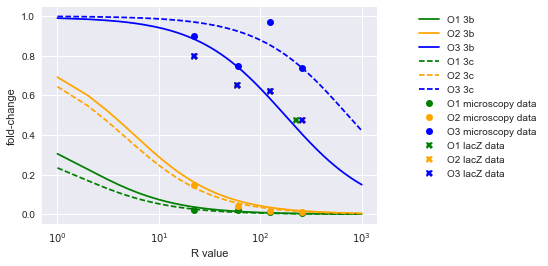

In [144]:
# 3.d.

# Initialize arrays to store fold-change values
fc_O1_3b = numpy.zeros(1000)
fc_O2_3b = numpy.zeros(1000)
fc_O3_3b = numpy.zeros(1000)
fc_O1_3c = numpy.zeros(1000)
fc_O2_3c = numpy.zeros(1000)
fc_O3_3c = numpy.zeros(1000)

# Calculate fold-changes
for i in range(1000):
    fc_O1_3b[i] = fold_change(i+1, best_ep1)
    fc_O2_3b[i] = fold_change(i+1, best_ep2)
    fc_O3_3b[i] = fold_change(i+1, best_ep3)
    fc_O1_3c[i] = fold_change(i+1, best_ep4)
    fc_O2_3c[i] = fold_change(i+1, best_ep5)
    fc_O3_3c[i] = fold_change(i+1, best_ep6)

# Plot stuff
plt.plot(range(1, 1001), fc_O1_3b, '-', color='green', label='O1 3b')
plt.plot(range(1, 1001), fc_O2_3b, '-', color='orange', label='O2 3b')
plt.plot(range(1, 1001), fc_O3_3b, '-', color='blue', label='O3 3b')
plt.plot(range(1, 1001), fc_O1_3c, '--', color='green', label='O1 3c')
plt.plot(range(1, 1001), fc_O2_3c, '--', color='orange', label='O2 3c')
plt.plot(range(1, 1001), fc_O3_3c, '--', color='blue', label='O3 3c')
plt.plot(rep_nums, fc_array[0], 'o', color='green', label = 'O1 microscopy data')
plt.plot(rep_nums, fc_array[1], 'o', color='orange', label = 'O2 microscopy data')
plt.plot(rep_nums, fc_array[2], 'o', color='blue', label = 'O3 microscopy data')
plt.plot(data_O1['repressor'], data_O3['fold_change'], 'x', marker='X', color='green', label = 'O1 lacZ data')
plt.plot(data_O2['repressor'], data_O3['fold_change'], 'x', marker='X', color='orange', label = 'O2 lacZ data')
plt.plot(data_O3['repressor'], data_O3['fold_change'], 'x', marker='X', color='blue', label = 'O3 lacZ data')
plt.xscale('log')
plt.xlabel('R value')
plt.ylabel('fold-change')
plt.legend(bbox_to_anchor=(1.1, 1))

3.d.

    The experimental methods agree fairly well except for O3. Since the 2 methods agree for O1 and O2, I would
    hypothesize that this disagreement stems from a fault in the measurements. 